# Proyek Akhir: Menyelesaikan Permasalahan Jaya Jaya Institut

- Nama: Muhammad Ma'ruf
- Email: muhmaruf354@gmail.com
- Id Dicoding: notfound313

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import requests
import zipfile
import io
import os
import pandas as pd
import numpy as np
import re
from io import StringIO
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from scipy.stats import chi2_contingency

### Menyiapkan data yang akan digunakan

## Data Understanding

### Background Story

Jaya Jaya Institut merupakan salah satu institusi pendidikan perguruan yang telah berdiri sejak tahun 2000. Hingga saat ini ia telah mencetak banyak lulusan dengan reputasi yang sangat baik. Akan tetapi, terdapat banyak juga siswa yang tidak menyelesaikan pendidikannya alias dropout.

Jumlah dropout yang tinggi ini tentunya menjadi salah satu masalah yang besar untuk sebuah institusi pendidikan. Oleh karena itu, Jaya Jaya Institut ingin mendeteksi secepat mungkin siswa yang mungkin akan melakukan dropout sehingga dapat diberi bimbingan khusus.

Dimintai untuk membantu Jaya Jaya Institut dalam menyelesaikan permasalahannya dan juga monitoring dari program tersebut.



### Getting Dataset

Dataset Mengambil dari sumber github yang telah disediakan oleh penyelenggara dan akan diload dalam bentuk dataframe.

In [2]:
url ='https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv'

# Unduh dataset
response = requests.get(url)
response.raise_for_status()

### Load Dataset

In [3]:
students_df = pd.read_csv(StringIO(response.text), sep=';')

In [4]:
pd.set_option('display.max_columns', None)# untuk memaksimalkan kolom yang ditampilkan

In [5]:
students_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Preparation / Preprocessing

### Data Cleaning

Tahap dalam penyortiran data yang tidak sesuai maupun hilang

In [6]:
students_df.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


Data tidak menunjukan adanya suatu informasi yang hilang artinya semua data lengkap

In [7]:
# cek data duplikat
students_df.duplicated().sum()

np.int64(0)

In [8]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [9]:
# Daftar data kategorical
categorical_columns = [
    'Marital_status',
    'Application_mode',
    'Course',
    'Daytime_evening_attendance',
    'Previous_qualification',
    'Nacionality',
    'Mothers_qualification',
    'Fathers_qualification',
    'Mothers_occupation',
    'Fathers_occupation',
    'Displaced',
    'Educational_special_needs',
    'Debtor',
    'Tuition_fees_up_to_date',
    'Gender',
    'Scholarship_holder',
    'International',
    'Status'
]

# Daftar kolom numerikal
numerical_columns = [
    'Application_order',
    'Previous_qualification_grade',
    'Admission_grade',
    'Age_at_enrollment',
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_without_evaluations',
    'Unemployment_rate',
    'Inflation_rate',
    'GDP'
]

In [10]:
# Cek kesesuaian data numerikal
new_df = students_df.copy()
new_df[numerical_columns].describe(include="all")

,Application_order,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.727848,132.613314,126.978119,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,1.313793,13.188332,14.482001,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,0.000000,95.000000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,125.000000,117.900000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,133.100000,126.100000,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,2.000000,140.000000,134.800000,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,9.000000,190.000000,190.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


### Data Understanding

In [11]:
# Checking korelasi antar fitur data numerical
correlation_matrix=new_df[numerical_columns].corr()
correlation_matrix



,Application_order,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
Application_order,1.000000,-0.064484,-0.096930,-0.271154,-0.133354,-0.016808,-0.092156,0.035580,0.058308,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201
Previous_qualification_grade,-0.064484,1.000000,0.580444,-0.111377,-0.008872,-0.029169,-0.070702,0.048410,0.059438,-0.003926,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620
Admission_grade,-0.096930,0.580444,1.000000,-0.029915,0.040829,-0.033251,-0.072059,0.070892,0.073868,0.009033,0.040225,-0.041878,-0.057132,0.076659,0.074402,-0.013254,0.038756,-0.021624,-0.019519
Age_at_enrollment,-0.271154,-0.111377,-0.029915,1.000000,0.226837,0.141327,0.139911,-0.053405,-0.156616,0.057470,0.207561,0.085914,0.056286,-0.112052,-0.173419,0.061654,0.025018,0.025377,-0.064678
Curricular_units_1st_sem_credited,-0.133354,-0.008872,0.040829,0.226837,1.000000,0.774344,0.542919,0.628394,0.122978,0.116262,0.944811,0.644826,0.427845,0.490478,0.132971,0.055256,0.009778,0.023348,-0.026513
Curricular_units_1st_sem_enrolled,-0.016808,-0.029169,-0.033251,0.141327,0.774344,1.000000,0.680220,0.769083,0.376996,0.129337,0.753747,0.942627,0.599567,0.673341,0.361959,0.069547,0.038404,0.036758,-0.026262
Curricular_units_1st_sem_evaluations,-0.092156,-0.070702,-0.072059,0.139911,0.542919,0.680220,1.000000,0.522396,0.418038,0.241800,0.522187,0.611842,0.778863,0.442265,0.355036,0.134296,0.061545,-0.006604,-0.099761
Curricular_units_1st_sem_approved,0.035580,0.048410,0.070892,-0.053405,0.628394,0.769083,0.522396,1.000000,0.696113,-0.013360,0.607661,0.733772,0.539934,0.904002,0.685560,-0.053983,0.051286,-0.007114,0.018459
Curricular_units_1st_sem_grade,0.058308,0.059438,0.073868,-0.156616,0.122978,0.376996,0.418038,0.696113,1.000000,-0.071660,0.113937,0.406167,0.487236,0.673335,0.837170,-0.066076,0.014821,-0.033904,0.054801
Curricular_units_1st_sem_without_evaluations,-0.031699,-0.003926,0.009033,0.057470,0.116262,0.129337,0.241800,-0.013360,-0.071660,1.000000,0.117359,0.109924,0.144683,-0.013070,-0.061482,0.583261,-0.045144,-0.052534,-0.144673


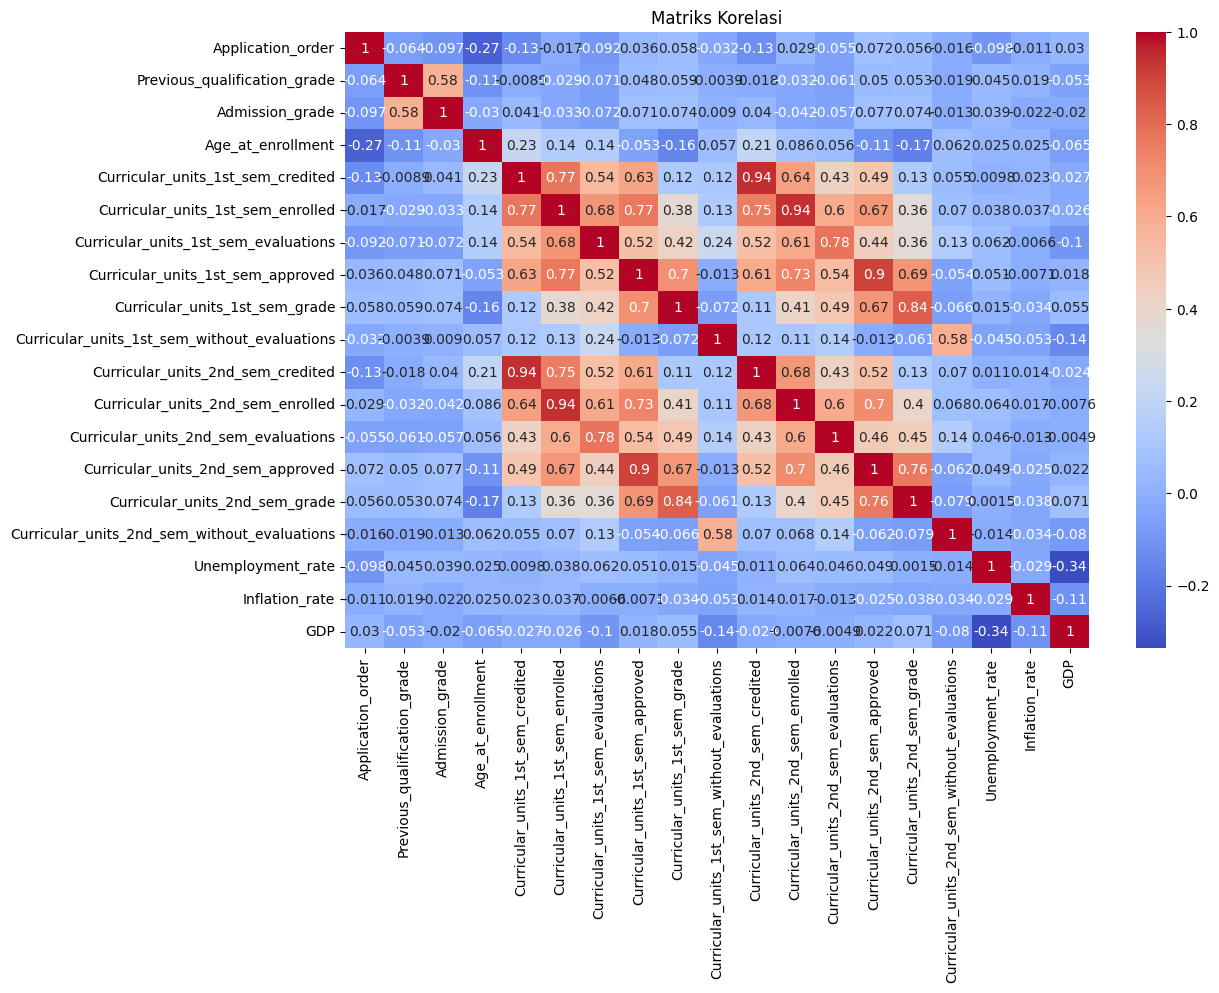

In [12]:
# Tampilkan heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

Fitur yang memiliki korelasi tinggi

| Fitur A                             | Fitur B                             | Korelasi  |
| ----------------------------------- | ----------------------------------- | --------- |
| `Curricular_units_1st_sem_credited` | `Curricular_units_2nd_sem_credited` | **0.944** |
| `Curricular_units_1st_sem_enrolled` | `Curricular_units_2nd_sem_enrolled` | **0.943** |
| `Curricular_units_1st_sem_approved` | `Curricular_units_2nd_sem_approved` | **0.904** |
| `Curricular_units_2nd_sem_approved` | `Curricular_units_2nd_sem_grade`    | **0.761** |
| `Curricular_units_1st_sem_grade`    | `Curricular_units_2nd_sem_grade`    | **0.837** |
| `Previous_qualification_grade`      | `Admission_grade`                   | **0.580** |
| `Curricular_units_1st_sem_enrolled` | `Curricular_units_1st_sem_approved` | **0.769** |
| `Curricular_units_2nd_sem_enrolled` | `Curricular_units_2nd_sem_approved` | **0.703** |
| `Curricular_units_1st_sem_approved` | `Curricular_units_1st_sem_grade`    | **0.696** |


Fitur yang memiliki korelasi tinggi negatif

| Fitur A             | Fitur B             | Korelasi                                           |
| ------------------- | ------------------- | -------------------------------------------------- |
| `Age_at_enrollment` | `Admission_grade`   | **-0.271** (cukup signifikan, meski tidak ekstrem) |
| `GDP`               | `Unemployment_rate` | **-0.335** (masuk akal secara ekonomi)             |


In [13]:
# Korelasi fitur dengan target
def chi_square_test(target, features_df):
    results = []
    for col in features_df.columns:
        table = pd.crosstab(features_df[col], target)
        stat, p, dof, expected = chi2_contingency(table)
        results.append({'feature': col, 'p_value': p})

    return pd.DataFrame(results).sort_values('p_value')


In [14]:
chi_square_test(new_df['Status'], new_df[categorical_columns])

,feature,p_value
17,Status,0.000000e+00
13,Tuition_fees_up_to_date,1.471628e-179
2,Course,2.316571e-97
15,Scholarship_holder,9.593930e-90
1,Application_mode,1.964657e-77
12,Debtor,4.858552e-57
14,Gender,2.222480e-51
8,Mothers_occupation,1.630859e-31
4,Previous_qualification,7.160305e-30
6,Mothers_qualification,5.823844e-21


Fitur yang relevan dan lolos uji p values

| Feature                      | p-value            |
| ---------------------------- | ------------------ |
| Status                       | **0.000000e+00**  |
| Tuition\_fees\_up\_to\_date  | **1.47e-179**     |
| Course                       | **2.31e-97**      |
| Scholarship\_holder          | **9.59e-90**      |
| Application\_mode            | **1.96e-77**      |
| Debtor                       | **4.86e-57**      |
| Gender                       | **2.22e-51**      |
| Mothers\_occupation          | **1.63e-31**      |
| Previous\_qualification      | **7.16e-30**      |
| Mothers\_qualification       | **5.82e-21**      |
| Fathers\_qualification       | **3.18e-19**      |
| Fathers\_occupation          | **4.52e-19**      |
| Displaced                    | **2.88e-13**      |
| Marital\_status              | **8.05e-10**      |
| Daytime\_evening\_attendance | **5.74e-07**      |


In [15]:
def cramers_v(target, features_df):
    results = []
    for col in features_df.columns:
        table = pd.crosstab(features_df[col], target)
        chi2 = chi2_contingency(table)[0]
        n = table.sum().sum()
        r, k = table.shape
        cramers_v_value = np.sqrt((chi2 / n) / (min(k - 1, r - 1)))
        results.append({'feature': col, 'cramers_v': cramers_v_value})

    return pd.DataFrame(results).sort_values('cramers_v', ascending=False)


In [16]:
cramers_v(new_df['Status'], new_df[categorical_columns])

,feature,cramers_v
17,Status,1.000000
13,Tuition_fees_up_to_date,0.431458
15,Scholarship_holder,0.304407
2,Course,0.251192
12,Debtor,0.242115
14,Gender,0.229625
1,Application_mode,0.229620
8,Mothers_occupation,0.181640
9,Fathers_occupation,0.172898
7,Fathers_qualification,0.159466


Gabungan Analisis: Chi-Square (p-value) + Cramér’s V
Berikut adalah gabungan kedua metrik ini untuk menentukan fitur kategorikal yang penting dan relevan:

 Fitur Signifikan tapi Hubungan Lemah (p < 0.05, Cramér’s V < 0.2):

| Feature                      | p-value    | Cramér’s V |
| ---------------------------- | ---------- | ---------- |
| Mothers\_occupation          | \~1.63e-31 | 0.18       |
| Fathers\_occupation          | \~4.52e-19 | 0.17       |
| Previous\_qualification      | \~7.16e-30 | 0.16       |
| Mothers\_qualification       | \~5.82e-21 | 0.16       |
| Fathers\_qualification       | \~3.18e-19 | 0.15       |
| Displaced                    | \~2.88e-13 | 0.11       |
| Marital\_status              | \~8.05e-10 | 0.08       |
| Daytime\_evening\_attendance | \~5.74e-07 | 0.08       |



Fitur Sangat Signifikan dan Kuat (p < 0.05 dan Cramér’s V ≥ 0.2):

| Feature                         | p-value     | Cramér’s V | Catatan                      |
| ------------------------------- | ----------- | ---------- | ---------------------------- |
| **Tuition\_fees\_up\_to\_date** | \~1.47e-179 | **0.43**   | Sangat kuat dan signifikan  |
| **Scholarship\_holder**         | \~9.59e-90  | **0.30**   | Kuat dan signifikan        |
| **Course**                      | \~2.31e-97  | **0.25**   | Cukup kuat dan signifikan   |
| **Debtor**                      | \~4.86e-57  | **0.24**   | Cukup kuat dan signifikan   |
| **Gender**                      | \~2.22e-51  | **0.23**   | Cukup kuat dan signifikan   |
| **Application\_mode**           | \~1.96e-77  | **0.23**   | Cukup kuat dan signifikan   |


In [17]:
# Dictionary encoder untuk semua kolom kategorikal
full_mapping_dict = {
    'Marital_status': {
        'single': 1, 'married': 2, 'widower': 3, 'divorced': 4,
        'facto  union': 5, 'legally separated': 6
    },
    'Application_mode': {
        '1st phase - general contingent': 1, 'Ordinance No. 612/93': 2,
        '1st phase - special contingent (Azores Island)': 5,
        'Holders of other higher courses': 7,
        'Ordinance No. 854-B/99': 10, 'International student (bachelor)': 15,
        '1st phase - special contingent (Madeira Island)': 16,
        '2nd phase - general contingent': 17,
        '3rd phase - general contingent': 18,
        'Ordinance No. 533-A/99, item b2) (Different Plan)': 26,
        'Ordinance No. 533-A/99, item b3 (Other Institution)': 27,
        'Over 23 years old': 39, 'Transfer': 42, 'Change of course': 43,
        'Technological specialization diploma holders': 44,
        'Change of institution/course': 51,
        'Short cycle diploma holders': 53,
        'Change of institution/course (International)': 57
    },
    'Course': {
        'Biofuel Production Technologies': 33,
        'Animation and Multimedia Design': 171,
        'Social Service (evening attendance)': 8014,
        'Agronomy': 9003, 'Communication Design': 9070,
        'Veterinary Nursing': 9085, 'Informatics Engineering': 9119,
        'Equinculture': 9130, 'Management': 9147,
        'Social Service': 9238, 'Tourism': 9254, 'Nursing': 9500,
        'Oral Hygiene': 9556, 'Advertising and Marketing Management': 9670,
        'Journalism and Communication': 9773,
        'Basic Education': 9853, 'Management (evening attendance)': 9991
    },
    'Daytime_evening_attendance': {'evening': 0, 'daytime': 1},
    'Previous_qualification': {
        'Secondary education': 1, "Higher education - bachelor's degree": 2,
        'Higher education - degree': 3, "Higher education - master's": 4,
        'Higher education - doctorate': 5, 'Frequency of higher education': 6,
        '12th year of schooling - not completed': 9,
        '11th year of schooling - not completed': 10,
        'Other - 11th year of schooling': 12,
        '10th year of schooling': 14,
        '10th year of schooling - not completed': 15,
        'Basic education 3rd cycle (9th/10th/11th year) or equiv.': 19,
        'Basic education 2nd cycle (6th/7th/8th year) or equiv.': 38,
        'Technological specialization course': 39,
        'Higher education - degree (1st cycle)': 40,
        'Professional higher technical course': 42,
        'Higher education - master (2nd cycle)': 43
    },
    'Nacionality': {
        'Portuguese': 1, 'German': 2, 'Spanish': 6, 'Italian': 11,
        'Dutch': 13, 'English': 14, 'Lithuanian': 17, 'Angolan': 21,
        'Cape Verdean': 22, 'Guinean': 24, 'Mozambican': 25,
        'Santomean': 26, 'Turkish': 32, 'Brazilian': 41, 'Romanian': 62,
        'Moldova (Republic of)': 100, 'Mexican': 101, 'Ukrainian': 103,
        'Russian': 105, 'Cuban': 108, 'Colombian': 109
    },
    'Gender': {'female': 0, 'male': 1},
    'Displaced': {'no': 0, 'yes': 1},
    'Educational_special_needs': {'no': 0, 'yes': 1},
    'Debtor': {'no': 0, 'yes': 1},
    'Tuition_fees_up_to_date': {'no': 0, 'yes': 1},
    'Scholarship_holder': {'no': 0, 'yes': 1},
    'International': {'no': 0, 'yes': 1}
}


In [18]:
categorical_mapping_dict = {
    "qualification": {
        1: 'Secondary Education - 12th Year of Schooling or Eq.',
        2: "Higher Education - Bachelor's Degree",
        3: 'Higher Education - Degree',
        4: "Higher Education - Master's",
        5: 'Higher Education - Doctorate',
        6: 'Frequency of Higher Education',
        9: '12th Year of Schooling - Not Completed',
        10: '11th Year of Schooling - Not Completed',
        11: '7th Year (Old)',
        12: 'Other - 11th Year of Schooling',
        13: '2nd year complementary high school course',
        14: '10th Year of Schooling',
        18: 'General commerce course',
        19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
        20: 'Complementary High School Course',
        22: 'Technical-professional course',
        25: 'Complementary High School Course - not concluded',
        26: '7th year of schooling',
        27: '2nd cycle of the general high school course',
        29: '9th Year of Schooling - Not Completed',
        30: '8th year of schooling',
        31: 'General Course of Administration and Commerce',
        33: 'Supplementary Accounting and Administration',
        34: 'Unknown',
        35: "Can't read or write",
        36: 'Can read without having a 4th year of schooling',
        37: 'Basic education 1st cycle (4th/5th year) or equiv.',
        38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
        39: 'Technological specialization course',
        40: 'Higher education - degree (1st cycle)',
        41: 'Specialized higher studies course',
        42: 'Professional higher technical course',
        43: 'Higher Education - Master (2nd cycle)',
        44: 'Higher Education - Doctorate (3rd cycle)',
    },
    "occupation_code": {
        0: "Student",
        1: "Legislative/Executive Bodies, Directors, Exec Managers",
        2: "Specialists in Intellectual and Scientific Activities",
        3: "Intermediate Level Technicians and Professions",
        4: "Administrative staff",
        5: "Personal Services, Security, Sellers",
        6: "Farmers and Skilled in Agriculture/Fisheries/Forestry",
        7: "Skilled Workers in Industry/Construction/Craftsmen",
        8: "Installation, Machine Operators, Assembly Workers",
        9: "Unskilled Workers",
        10: "Armed Forces Professions",
        90: "Other Situation",
        99: "(blank)",
        101: "Armed Forces Officers",
        102: "Armed Forces Sergeants",
        103: "Other Armed Forces personnel",
        112: "Admin and Commercial Services Directors",
        114: "Hotel/Catering/Trade Services Directors",
        121: "Science, Math, Engineering Specialists",
        122: "Health professionals",
        123: "Teachers",
        124: "Finance, Accounting, Admin Specialists",
        125: "ICT Specialists",
        131: "Science/Engineering Intermediate Technicians",
        132: "Health Intermediate Technicians",
        134: "Legal, Social, Sports, Cultural Intermediate Tech",
        135: "ICT Technicians",
        141: "Office workers, Secretaries, Data Ops",
        143: "Accounting/Finance/Registry Operators",
        144: "Other Admin Support Staff",
        151: "Personal service workers",
        152: "Sellers",
        153: "Personal care workers",
        154: "Protection/Security Services",
        161: "Market-Oriented Farmers/Animal Workers",
        163: "Subsistence Farmers/Fishermen/Hunters",
        171: "Skilled Construction Workers (not electricians)",
        172: "Skilled Metallurgy/Metalworking Workers",
        173: "Skilled Workers: Printing, Precision, Jewelers",
        174: "Skilled Electrical/Electronic Workers",
        175: "Food/Woodworking/Clothing Industry Workers",
        181: "Fixed Plant and Machine Operators",
        182: "Assembly Workers",
        183: "Vehicle Drivers and Equipment Operators",
        191: "Cleaning workers",
        192: "Unskilled Agriculture/Fisheries/Forestry Workers",
        193: "Unskilled Extractive/Construction/Transport Workers",
        194: "Meal Preparation Assistants",
        195: "Street Vendors/Service Providers (non-food)",
    }
}


In [19]:
reverse_mapping_dict = {
    feature: {v: k for k, v in mapping.items()}
    for feature, mapping in full_mapping_dict.items()
}


In [20]:
# Mengambil fitur yang memiliki hubungan kuat
selected_categorical = [
    'Tuition_fees_up_to_date',
    'Scholarship_holder',
    'Course',
    'Debtor',
    'Gender',
    'Application_mode',
    'Status'
]

selected_numerical = [
    'Application_order',
    'Previous_qualification_grade',
    'Admission_grade',
    'Age_at_enrollment',
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Unemployment_rate',
    'GDP'

]

In [21]:
feature_selected_df = new_df[selected_categorical + selected_numerical]
feature_selected_df.head()

,Tuition_fees_up_to_date,Scholarship_holder,Course,Debtor,Gender,Application_mode,Status,Application_order,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Unemployment_rate,GDP
0,1,0,171,0,1,17,Dropout,5,122.0,127.3,20,0,0,0,0.000000,0,0,0,0.000000,10.8,1.74
1,0,0,9254,0,1,15,Graduate,1,160.0,142.5,19,0,6,6,14.000000,0,6,6,13.666667,13.9,0.79
2,0,0,9070,0,1,1,Dropout,5,122.0,124.8,19,0,6,0,0.000000,0,6,0,0.000000,10.8,1.74
3,1,0,9773,0,0,17,Graduate,2,122.0,119.6,20,0,6,6,13.428571,0,6,5,12.400000,9.4,-3.12
4,1,0,8014,0,0,39,Graduate,1,100.0,141.5,45,0,6,5,12.333333,0,6,6,13.000000,13.9,0.79


In [22]:
# Mengembalikan nilai awal dari kategorikal
def decode_dataframe(df, categorical_columns, mapping_dict):
    df_decoded = df.copy()
    for col in categorical_columns:
        if col in mapping_dict:
            df_decoded[col] = df[col].map(mapping_dict[col]).fillna(df[col])

    return df_decoded


In [23]:
decoded_df = decode_dataframe(feature_selected_df, selected_categorical, reverse_mapping_dict)
decoded_df.head()

,Tuition_fees_up_to_date,Scholarship_holder,Course,Debtor,Gender,Application_mode,Status,Application_order,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Unemployment_rate,GDP
0,yes,no,Animation and Multimedia Design,no,male,2nd phase - general contingent,Dropout,5,122.0,127.3,20,0,0,0,0.000000,0,0,0,0.000000,10.8,1.74
1,no,no,Tourism,no,male,International student (bachelor),Graduate,1,160.0,142.5,19,0,6,6,14.000000,0,6,6,13.666667,13.9,0.79
2,no,no,Communication Design,no,male,1st phase - general contingent,Dropout,5,122.0,124.8,19,0,6,0,0.000000,0,6,0,0.000000,10.8,1.74
3,yes,no,Journalism and Communication,no,female,2nd phase - general contingent,Graduate,2,122.0,119.6,20,0,6,6,13.428571,0,6,5,12.400000,9.4,-3.12
4,yes,no,Social Service (evening attendance),no,female,Over 23 years old,Graduate,1,100.0,141.5,45,0,6,5,12.333333,0,6,6,13.000000,13.9,0.79


In [24]:
decoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Tuition_fees_up_to_date            4424 non-null   object 
 1   Scholarship_holder                 4424 non-null   object 
 2   Course                             4424 non-null   object 
 3   Debtor                             4424 non-null   object 
 4   Gender                             4424 non-null   object 
 5   Application_mode                   4424 non-null   object 
 6   Status                             4424 non-null   object 
 7   Application_order                  4424 non-null   int64  
 8   Previous_qualification_grade       4424 non-null   float64
 9   Admission_grade                    4424 non-null   float64
 10  Age_at_enrollment                  4424 non-null   int64  
 11  Curricular_units_1st_sem_credited  4424 non-null   int64

### Train and  test split

In [25]:
# Split dataset dengan ukuran 80:20
train_df, test_df = train_test_split(decoded_df, test_size=0.2, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
print(train_df.shape)
print(test_df.shape)

(3539, 21)
(885, 21)


In [26]:
decoded_df.Application_mode.value_counts()

,count
Application_mode,
1st phase - general contingent,1708
2nd phase - general contingent,872
Over 23 years old,785
Change of course,312
Technological specialization diploma holders,213
Holders of other higher courses,139
3rd phase - general contingent,124
Transfer,77
Change of institution/course,59


### Undersampling

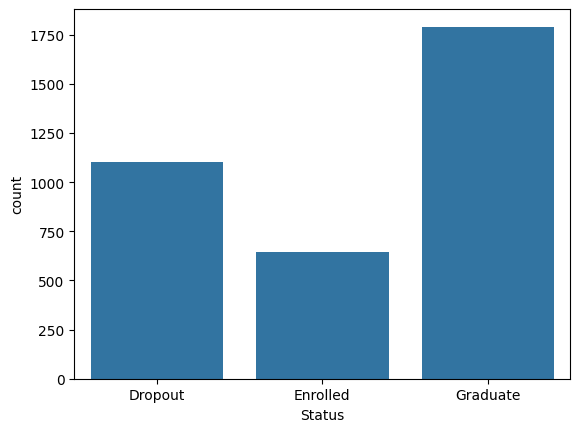

In [27]:
sns.countplot(data=train_df, x="Status")
plt.show()

In [28]:
train_df.Status.value_counts()

,count
Status,
Graduate,1791
Dropout,1105
Enrolled,643


In [29]:
df_majority_1 = train_df[(train_df.Status == "Graduate")]
df_majority_2 = train_df[(train_df.Status == "Dropout")]
df_minority = train_df[(train_df.Status == "Enrolled")]

In [30]:
df_majority_2_undersampled = resample(df_majority_2, n_samples=1791, random_state=42)
df_minority_undersampled = resample(df_minority, n_samples=1791, random_state=42)


print(df_minority_undersampled.shape)
print(df_majority_2_undersampled.shape)

(1791, 21)
(1791, 21)


In [31]:
oversampled_train_df = pd.concat([df_majority_1, df_majority_2_undersampled]).reset_index(drop=True)
oversampled_train_df = pd.concat([oversampled_train_df, df_minority_undersampled]).reset_index(drop=True)
oversampled_train_df = shuffle(oversampled_train_df, random_state=42)
oversampled_train_df.reset_index(drop=True, inplace=True)

oversampled_train_df.sample(5)

,Tuition_fees_up_to_date,Scholarship_holder,Course,Debtor,Gender,Application_mode,Status,Application_order,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Unemployment_rate,GDP
3607,yes,no,Basic Education,no,female,2nd phase - general contingent,Dropout,1,140.0,122.3,19,0,6,4,13.000000,0,6,4,12.250000,12.7,-1.70
2472,yes,no,Nursing,no,male,1st phase - general contingent,Graduate,1,154.0,142.0,19,0,8,7,13.714286,0,8,7,13.714286,12.7,-1.70
533,yes,no,Social Service,no,female,1st phase - general contingent,Graduate,1,128.0,120.3,19,0,6,2,13.000000,0,6,5,11.600000,7.6,0.32
2283,yes,no,Tourism,no,male,Over 23 years old,Graduate,2,133.1,123.5,39,0,6,6,13.500000,0,6,6,13.333333,12.4,1.79
543,yes,no,Social Service,no,female,2nd phase - general contingent,Enrolled,5,130.0,130.0,20,0,6,4,11.250000,0,6,3,10.000000,9.4,-3.12


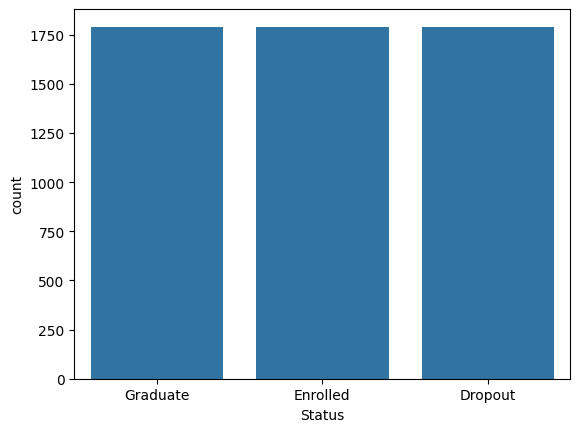

In [32]:
sns.countplot(data=oversampled_train_df, x="Status")
plt.show()

In [33]:
X_train = oversampled_train_df.drop(columns="Status", axis=1)
y_train = oversampled_train_df["Status"]

X_test = test_df.drop(columns="Status", axis=1)
y_test = test_df["Status"]

In [34]:
def scaling(features, df, df_test=None, save_dir='model'):
    df = df.copy()
    if df_test is not None:
        df_test = df_test.copy()

    os.makedirs(save_dir, exist_ok=True)

    for feature in features:
        if feature in df.columns:
            scaler = StandardScaler()
            X = df[feature].values.reshape(-1, 1)
            scaler.fit(X)

            df[feature] = scaler.transform(X)
            joblib.dump(scaler, f"{save_dir}/scaler_{feature}.joblib")

            if df_test is not None and feature in df_test.columns:
                X_test = df_test[feature].values.reshape(-1, 1)
                df_test[feature] = scaler.transform(X_test)

    return (df, df_test) if df_test is not None else df



def encoding(features, df, df_test=None, save_dir='model'):
    df = df.copy()
    if df_test is not None:
        df_test = df_test.copy()

    os.makedirs(save_dir, exist_ok=True)

    for feature in features:
        if feature in df.columns:
            encoder = LabelEncoder()
            encoder.fit(df[feature])

            df[feature] = encoder.transform(df[feature])
            joblib.dump(encoder, f"{save_dir}/encoder_{feature}.joblib")

            if df_test is not None and feature in df_test.columns:
                df_test[feature] = encoder.transform(df_test[feature])

    return (df, df_test) if df_test is not None else df


In [35]:
categorical = [
    'Tuition_fees_up_to_date',
    'Scholarship_holder',
    'Course',
    'Debtor',
    'Gender',
    'Application_mode',
]
new_train_df, new_test_df = scaling(selected_numerical, X_train, X_test)

In [36]:
def check_unseen_labels(feature, df_train, df_test):
    train_labels = set(df_train[feature].unique())
    test_labels = set(df_test[feature].unique())

    unseen = test_labels - train_labels
    return unseen


In [37]:
new_test_df.Application_mode.value_counts()

,count
Application_mode,
1st phase - general contingent,357
2nd phase - general contingent,164
Over 23 years old,155
Change of course,59
Technological specialization diploma holders,53
Holders of other higher courses,30
3rd phase - general contingent,19
Change of institution/course,14
Transfer,10


In [38]:
new_train_df.Application_mode.value_counts()

,count
Application_mode,
1st phase - general contingent,1923
2nd phase - general contingent,1091
Over 23 years old,1043
Change of course,398
Technological specialization diploma holders,248
Holders of other higher courses,176
3rd phase - general contingent,174
Transfer,89
Change of institution/course,72


In [39]:

unseen_labels = check_unseen_labels('Application_mode', new_train_df, new_test_df)

if unseen_labels:
    print(f"Unseen labels in test data for 'Application_mode': {unseen_labels}")
else:
    print("No unseen labels in test data.")


No unseen labels in test data.


In [40]:
new_train_df, new_test_df = encoding(categorical_columns, new_train_df, new_test_df)

In [41]:
encoder = LabelEncoder()
encoder.fit(y_train)
new_y_train = encoder.transform(y_train)
joblib.dump(encoder, "model/encoder_target.joblib")

new_y_test = encoder.transform(y_test)

### PCA (Principal Component Analysis)

In [42]:
pca_numerical_c1 = [
    'Application_order',
    'Previous_qualification_grade',
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',

]

pca_numerical_c2 = [
    'Age_at_enrollment',
    'Unemployment_rate',
    'GDP',
    'Admission_grade',
]

In [43]:
train_pca_df = new_train_df.copy().reset_index(drop=True)
test_pca_df = new_test_df.copy().reset_index(drop=True)

In [44]:
def plot_pca_variance(data, features, random_state=123):
    pca = PCA(n_components=len(features), random_state=random_state)
    principal_components = pca.fit_transform(data[features])

    var_exp = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(var_exp)

    plt.figure(figsize=(8, 5))
    plt.bar(range(len(features)), var_exp, alpha=0.5, label='Individual variance')
    plt.plot(cum_var_exp, marker='o', label='Cumulative variance')
    plt.xticks(range(len(features)))
    plt.xlabel('Principal Component Index')
    plt.ylabel('Explained Variance Ratio')
    plt.title('PCA Explained Variance')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return pca, principal_components , var_exp


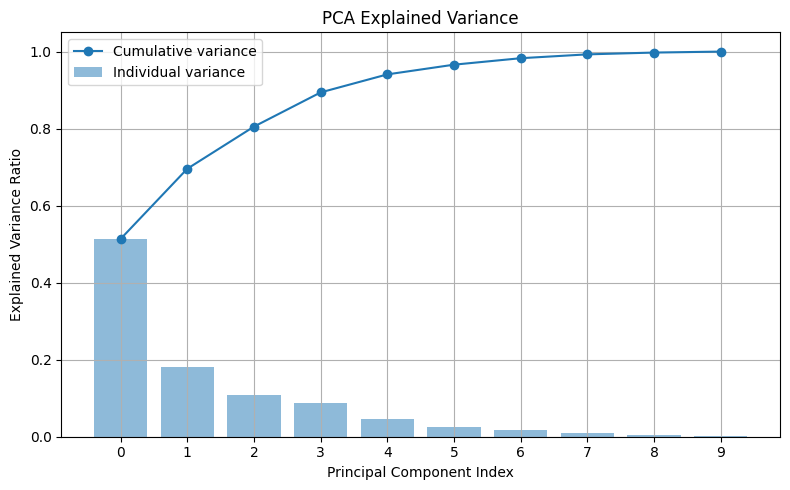

In [45]:
pca_model, pca_features, var_exp = plot_pca_variance(train_pca_df, pca_numerical_c1)


In [46]:
cumulative_variance = var_exp.cumsum()
for i, total in enumerate(cumulative_variance):
    if total >= 0.9:
        print(f"Butuh {i+1} komponen untuk menjelaskan {total:.2%} dari variasi data.")
        break

Butuh 5 komponen untuk menjelaskan 94.08% dari variasi data.


In [47]:
pca_1 = PCA(n_components=5, random_state=123)
pca_1.fit(train_pca_df[pca_numerical_c1])
joblib.dump(pca_1, "model/pca_{}.joblib".format(1))
princ_comp_1 = pca_1.transform(train_pca_df[pca_numerical_c1])
train_pca_df[["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"]] = pd.DataFrame(princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"])
train_pca_df.drop(columns=pca_numerical_c1, axis=1, inplace=True)
train_pca_df.head()

,Tuition_fees_up_to_date,Scholarship_holder,Course,Debtor,Gender,Application_mode,Admission_grade,Age_at_enrollment,Unemployment_rate,GDP,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5
0,1,1,13,0,0,3,0.550014,-0.728993,-0.178135,0.870109,0.793195,1.262091,0.823722,-0.363970,-0.020150
1,1,0,16,1,0,0,-1.713717,-0.202177,0.307884,0.770273,0.147638,0.456950,-1.309093,-2.096804,-0.009468
2,1,0,3,0,0,0,0.277275,-0.597289,0.420042,-0.744626,-2.483888,-2.057921,-0.428628,0.658249,0.856425
3,1,0,11,0,0,5,-0.527304,-0.333881,0.868675,0.336205,0.645886,0.653210,0.542824,-0.311506,0.608737
4,1,0,10,0,0,14,1.484144,0.588048,-0.290294,0.748570,-0.423122,0.675471,1.305469,0.164958,-0.191847


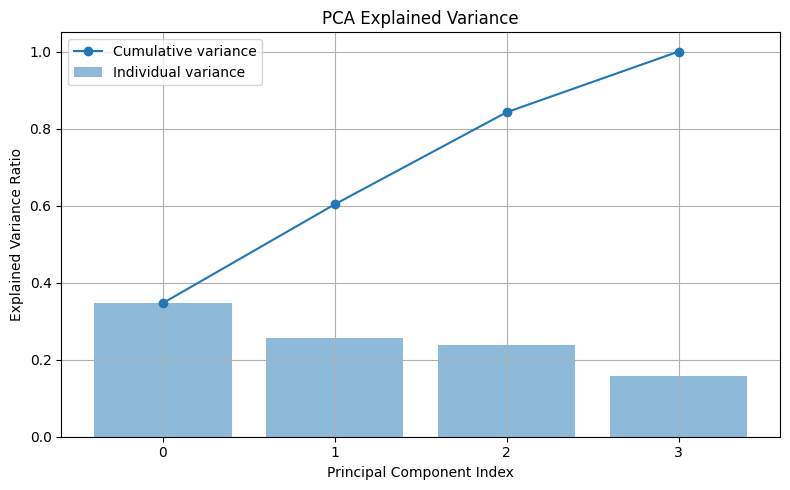

In [48]:
pca_model, pca_features, var_exp = plot_pca_variance(train_pca_df, pca_numerical_c2)


In [49]:
cumulative_variance = var_exp.cumsum()
for i, total in enumerate(cumulative_variance):
    if total >= 0.8:
        print(f"Butuh {i+1} komponen untuk menjelaskan {total:.2%} dari variasi data.")
        break

Butuh 3 komponen untuk menjelaskan 84.25% dari variasi data.


In [50]:
pca_2 = PCA(n_components=3, random_state=123)
pca_2.fit(train_pca_df[pca_numerical_c2])
joblib.dump(pca_2, "model/pca_{}.joblib".format(2))
princ_comp_2 = pca_2.transform(train_pca_df[pca_numerical_c2])
train_pca_df[["pc2_1", "pc2_2","pca2_3"]] = pd.DataFrame(princ_comp_2, columns=["pc2_1", "pc2_2","pca2_3"])
train_pca_df.drop(columns=pca_numerical_c2, axis=1, inplace=True)
train_pca_df.head()

,Tuition_fees_up_to_date,Scholarship_holder,Course,Debtor,Gender,Application_mode,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5,pc2_1,pc2_2,pca2_3
0,1,1,13,0,0,3,0.793195,1.262091,0.823722,-0.363970,-0.020150,0.805375,0.885946,-0.036460
1,1,0,16,1,0,0,0.147638,0.456950,-1.309093,-2.096804,-0.009468,0.532758,-1.121351,-1.228898
2,1,0,3,0,0,0,-2.483888,-2.057921,-0.428628,0.658249,0.856425,-0.724822,0.625782,-0.412660
3,1,0,11,0,0,5,0.645886,0.653210,0.542824,-0.311506,0.608737,-0.249977,-0.107902,-0.694799
4,1,0,10,0,0,14,-0.423122,0.675471,1.305469,0.164958,-0.191847,0.462731,0.709479,1.537205


In [51]:
test_princ_comp_1 = pca_1.transform(test_pca_df[pca_numerical_c1])
test_pca_df[["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"]] = pd.DataFrame(test_princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"])
test_pca_df.drop(columns=pca_numerical_c1, axis=1, inplace=True)

test_princ_comp_1 = pca_2.transform(test_pca_df[pca_numerical_c2])
test_pca_df[["pc2_1", "pc2_2","pca2_3"]] = pd.DataFrame(test_princ_comp_1, columns=["pc2_1", "pc2_2","pca2_3"])
test_pca_df.drop(columns=pca_numerical_c2, axis=1, inplace=True)
test_pca_df.head()

,Tuition_fees_up_to_date,Scholarship_holder,Course,Debtor,Gender,Application_mode,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5,pc2_1,pc2_2,pca2_3
0,1,1,6,0,0,14,-1.798954,-1.233986,0.189285,-0.158208,0.619627,0.681727,-1.390412,0.033076
1,1,0,13,0,0,3,0.342734,0.621330,0.018091,-0.874357,0.014762,-1.294605,0.281291,-1.153526
2,1,1,3,1,0,3,1.164820,0.797251,0.415267,-0.439700,0.398027,-1.346747,0.669486,-0.814393
3,1,0,0,0,1,3,0.524012,0.969619,-1.257280,-1.160119,-0.219136,-2.054703,-0.066157,-1.376608
4,1,0,11,0,0,14,-2.131346,-2.376868,-0.198826,0.026849,1.442059,0.780217,-1.324444,-0.423842


## Modeling

In [52]:
tree_model = DecisionTreeClassifier(random_state=123)

param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5, 6, 7, 8],
    'criterion' :['gini', 'entropy']
}

CV_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_tree.fit(train_pca_df, new_y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [53]:
print("best parameters: ", CV_tree.best_params_)

best parameters:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}


In [54]:
tree_model = DecisionTreeClassifier(
    random_state=123,
    criterion='gini',
    max_depth=8,
    max_features='sqrt'
)

tree_model.fit(train_pca_df, new_y_train)
joblib.dump(tree_model, "model/tree_model.joblib")

['model/tree_model.joblib']

In [55]:
rdf_model = RandomForestClassifier(random_state=123)

param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6, 7, 8],
    'criterion' :['gini', 'entropy']
}

CV_rdf = GridSearchCV(estimator=rdf_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_rdf.fit(train_pca_df, new_y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [56]:
print("best parameters: ", CV_rdf.best_params_)

best parameters:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500}


In [57]:
rdf_model = RandomForestClassifier(
    random_state=123,
    max_depth=8,
    n_estimators=500,
    max_features='sqrt',
    criterion='gini',
    n_jobs=-1
)
rdf_model.fit(train_pca_df, new_y_train)
joblib.dump(rdf_model, "model/rdf_model.joblib")

['model/rdf_model.joblib']

In [58]:
gboost_model = GradientBoostingClassifier(random_state=123)

param_grid = {
    'max_depth': [5, 8],
    'n_estimators': [200, 300],
    'learning_rate': [0.01, 0.1],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_gboost = GridSearchCV(estimator=gboost_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_gboost.fit(train_pca_df, new_y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [5, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300]})

In [59]:
print("best parameters: ", CV_gboost.best_params_)

best parameters:  {'learning_rate': 0.1, 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 300}


In [60]:
gboost_model = GradientBoostingClassifier(
    random_state=123,
    learning_rate=0.1,
    max_depth=8,
    max_features='sqrt',
    n_estimators=300
)
gboost_model.fit(train_pca_df, new_y_train)
joblib.dump(gboost_model, "model/gboost_model.joblib")

['model/gboost_model.joblib']

## Evaluation

In [61]:
def evaluating(y_pred, y_true):
    '''Evaluasi model untuk label Status: Graduate, Dropout, Enrolled'''
    labels = ['Graduate', 'Dropout', 'Enrolled']

    print(classification_report(y_true, y_pred, labels=labels, zero_division=0))

    cnf_matrix = confusion_matrix(y_true, y_pred, labels=labels)
    confusion_matrix_df = pd.DataFrame(cnf_matrix, index=labels, columns=labels)

    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='YlGnBu', annot_kws={'size': 14})
    plt.title('Confusion Matrix', fontsize=16)
    plt.ylabel('True Label', fontsize=13)
    plt.xlabel('Predicted Label', fontsize=13)
    plt.tight_layout()
    plt.show()

    return confusion_matrix_df

In [62]:
y_pred_test = tree_model.predict(test_pca_df)
y_pred_test = encoder.inverse_transform(y_pred_test)

              precision    recall  f1-score   support

    Graduate       0.75      0.77      0.76       418
     Dropout       0.83      0.59      0.69       316
    Enrolled       0.32      0.49      0.39       151

    accuracy                           0.66       885
   macro avg       0.63      0.62      0.61       885
weighted avg       0.70      0.66      0.67       885



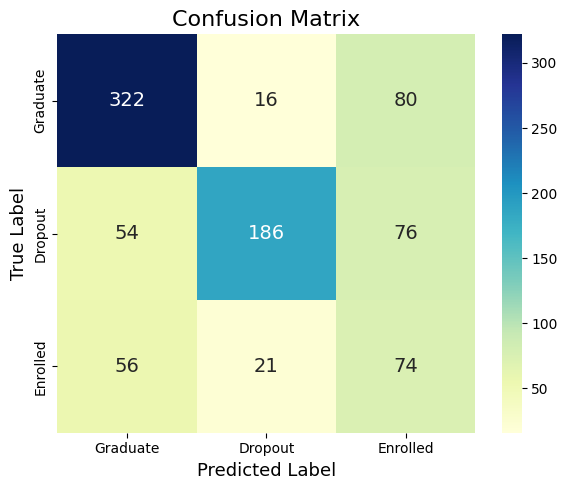

,Graduate,Dropout,Enrolled
Graduate,322,16,80
Dropout,54,186,76
Enrolled,56,21,74


In [63]:
evaluating(y_pred=y_pred_test, y_true=y_test)

              precision    recall  f1-score   support

    Graduate       0.80      0.86      0.83       418
     Dropout       0.86      0.66      0.75       316
    Enrolled       0.42      0.55      0.48       151

    accuracy                           0.74       885
   macro avg       0.70      0.69      0.69       885
weighted avg       0.76      0.74      0.74       885



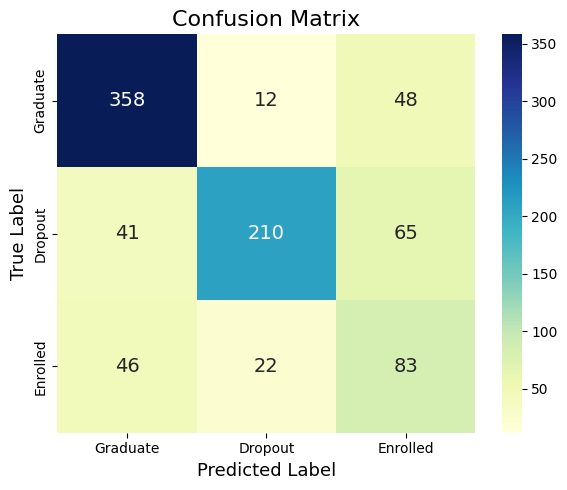

,Graduate,Dropout,Enrolled
Graduate,358,12,48
Dropout,41,210,65
Enrolled,46,22,83


In [64]:
y_pred_test = rdf_model.predict(test_pca_df)
y_pred_test = encoder.inverse_transform(y_pred_test)

evaluating(y_pred=y_pred_test, y_true=y_test)

              precision    recall  f1-score   support

    Graduate       0.77      0.92      0.84       418
     Dropout       0.84      0.71      0.77       316
    Enrolled       0.47      0.36      0.41       151

    accuracy                           0.75       885
   macro avg       0.69      0.66      0.67       885
weighted avg       0.74      0.75      0.74       885



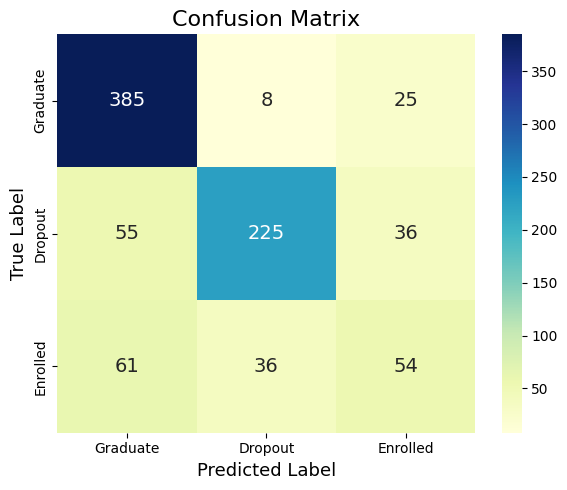

,Graduate,Dropout,Enrolled
Graduate,385,8,25
Dropout,55,225,36
Enrolled,61,36,54


In [65]:
y_pred_test = gboost_model.predict(test_pca_df)
y_pred_test = encoder.inverse_transform(y_pred_test)

evaluating(y_pred=y_pred_test, y_true=y_test)

In [66]:
joblib.dump(gboost_model, "model/gboost_model.joblib")

['model/gboost_model.joblib']

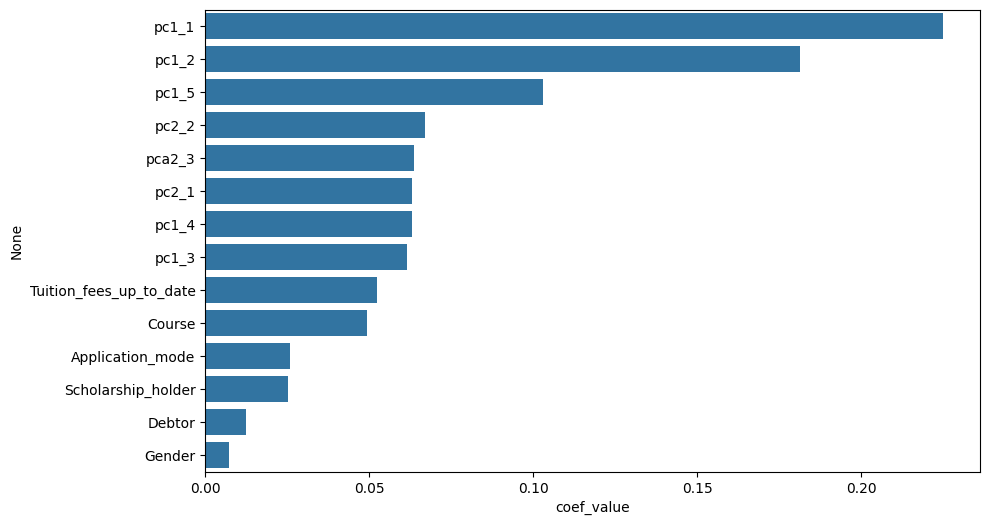

,coef_value
pc1_1,0.225025
pc1_2,0.181486
pc1_5,0.103009
pc2_2,0.066931
pca2_3,0.063741
pc2_1,0.063060
pc1_4,0.063011
pc1_3,0.061469
Tuition_fees_up_to_date,0.052389
Course,0.049200


In [67]:
def plot_feature_importances(feature_importances, cols):
    features = pd.DataFrame(feature_importances, columns=['coef_value']).set_index(cols)
    features = features.sort_values(by='coef_value', ascending=False)
    top_features = features

    plt.figure(figsize=(10, 6))
    sns.barplot(x='coef_value', y=features.index, data=features)
    plt.show()
    return top_features

plot_feature_importances(gboost_model.feature_importances_, train_pca_df.columns)

Dari hasil dari berbagai model yang memilki performa bagus yaitu GradientBoost dan ini akan menjadi model selanjutnya untuk menentukan prediksi status performa student